# Confidence Interval

In [179]:
# download excel file
import pandas as pd
!gdown --id 1XkX4MFsqDGb0nUWh_qlWF0ajk3p3DGe0

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1XkX4MFsqDGb0nUWh_qlWF0ajk3p3DGe0
To: /content/Raw dataset_MJH.xlsx
100% 199k/199k [00:00<00:00, 95.2MB/s]


In [180]:
#read excel file
file_path = '/content/Raw dataset_MJH.xlsx'
df = pd.read_excel(file_path)

In [181]:
#checking for null values
df.isnull().sum()

Sr No                                      0
1. Gender=?                                0
2. Age (years)=?                           0
3. Education level=?                       0
4. Current living area=?                   0
5. Monthly family income (taka)            0
6. University type=?                       0
7. Hieght (cm)                             0
8. BMI-before COVID                        0
9. BMI at present                          0
10. Smoking habit=?                        0
11. Eating large meals or snacks           0
12. Physical exercise                      0
13. Physical activity                     12
14. Sound sleep at night                   0
15. physical disturbance                   0
16. Feeling lonely                         0
17. Feeling depressed                      0
18. Feeling anxious                        0
19. Had suicidal thoughts                  0
20.\tHad conflict/arguments with othe      0
21. Been verbally or physically abused     0
dtype: int

In [182]:
# filling the data with mode value
mode_activity = df.iloc[:, 13].mode()
df = df.fillna(value = str(mode_activity))

<Axes: ylabel='7. Hieght (cm)'>

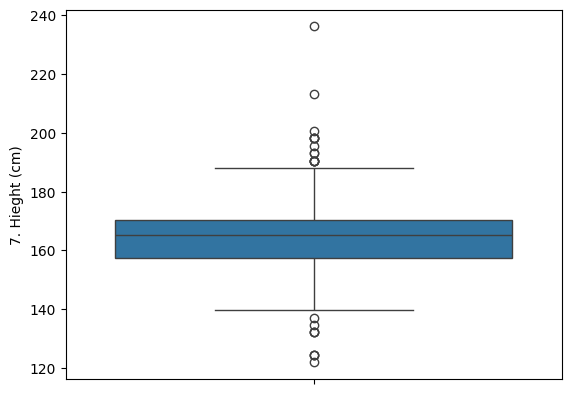

In [183]:
# checking for outliers of height
import numpy as np
from scipy import stats
from scipy.stats import norm, t, ttest_ind, ttest_rel
import seaborn as sns
import matplotlib.pyplot as plt

height = df['7. Hieght (cm)']

sns.boxplot(height)

<Axes: >

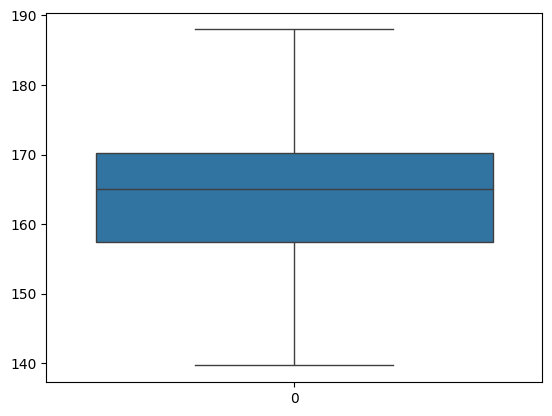

In [184]:
# removed outliers
q1 = height.quantile(0.25)
q3 = height.quantile(0.75)

IQR = q3 - q1

lf = float(q1 - 1.5 * IQR)
uf = float(q3 + 1.5 * IQR)

height = list(filter(lambda x: x <= uf and x >= lf, height.tolist()))
height = pd.DataFrame(height)

sns.boxplot(height)

In [185]:
sample_size = len(height)

mean = np.mean(height)
standard_deviation = np.std(height)
confidence_level = 0.95

sample = np.random.normal(mean, standard_deviation, sample_size)

sample_mean = np.mean(sample)
sample_se = stats.sem(sample)

ci_lower, ci_upper = stats.t.interval(confidence_level, df=sample_size-1, loc=sample_mean, scale=sample_se)
print(mean)
print(standard_deviation)
print(f"95% confidence interval is {ci_lower} to {ci_upper}")

0    164.358764
dtype: float64
0    8.504617
dtype: float64
95% confidence interval is 163.78403492057905 to 164.59760533313218


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


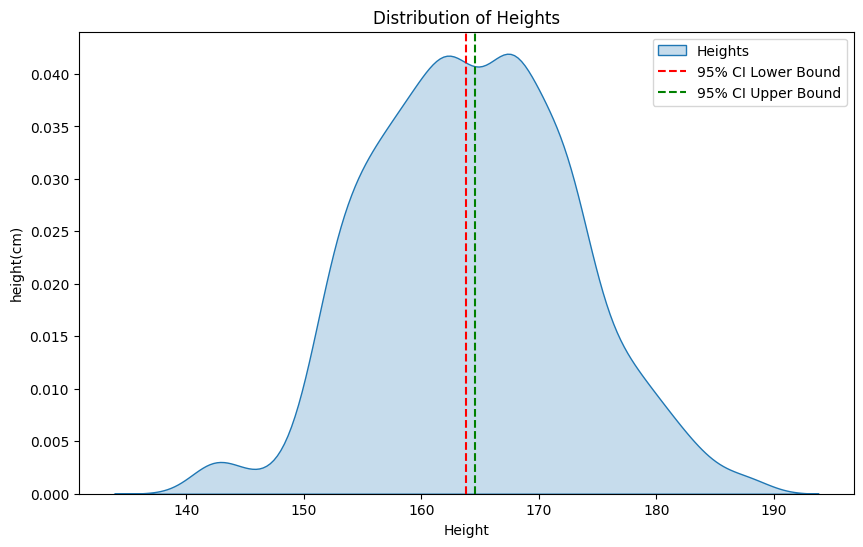

In [186]:
# showing confidence interval

plt.figure(figsize=(10, 6))
sns.kdeplot(height, label='Heights', fill=True)
plt.axvline(x=ci_lower, linestyle='--', color='red', label='95% CI Lower Bound')
plt.axvline(x=ci_upper, linestyle='--', color='green', label='95% CI Upper Bound')
plt.title('Distribution of Heights')
plt.xlabel('Height')
plt.ylabel('height(cm)')
plt.legend()
plt.show()

In [187]:
def confidence_interval(confidence_level, mean, standard_deviation, sample_size):
  z_alpha_by_2 = abs(stats.norm.ppf((1 - confidence_level) / 2))
  ci_lower = mean - z_alpha_by_2 * standard_deviation / np.sqrt(sample_size)
  ci_upper = mean + z_alpha_by_2 * standard_deviation / np.sqrt(sample_size)
  return ci_lower.to_numpy(), ci_upper.to_numpy()

In [188]:
ci_lower, ci_upper = confidence_interval(confidence_level = confidence_level,
                                         mean = mean,
                                         standard_deviation=standard_deviation,
                                         sample_size = sample_size)

print(mean)
print(type(ci_lower))
print(standard_deviation)
print(f"95% confidence interval is {ci_lower} to {ci_upper}")

0    164.358764
dtype: float64
<class 'numpy.ndarray'>
0    8.504617
dtype: float64
95% confidence interval is [163.93915087] to [164.77837765]


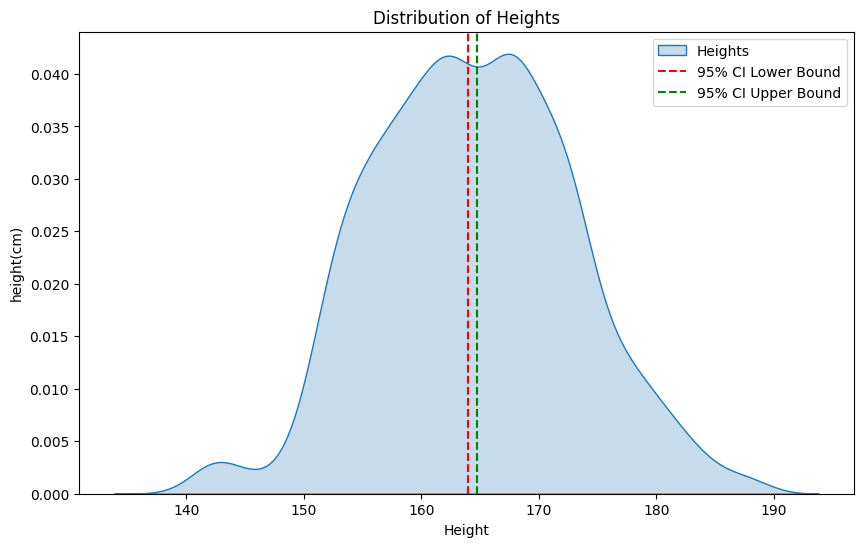

In [189]:
# showing confidence interval

plt.figure(figsize=(10, 6))
sns.kdeplot(height, label='Heights', fill=True)
plt.axvline(x=ci_lower, linestyle='--', color='red', label='95% CI Lower Bound')
plt.axvline(x=ci_upper, linestyle='--', color='green', label='95% CI Upper Bound')
plt.title('Distribution of Heights')
plt.xlabel('Height')
plt.ylabel('height(cm)')
plt.legend()
plt.show()

Here i used 2 function one is the scipy built in function another is the theoritical equation that we derived in the theory class.
<br>
lower_ci = mean - standard_deviation / root(n)<br>
upper_ci = mean + standard_deviation / root(n)







# Z-Test

<Axes: ylabel='8. BMI-before COVID'>

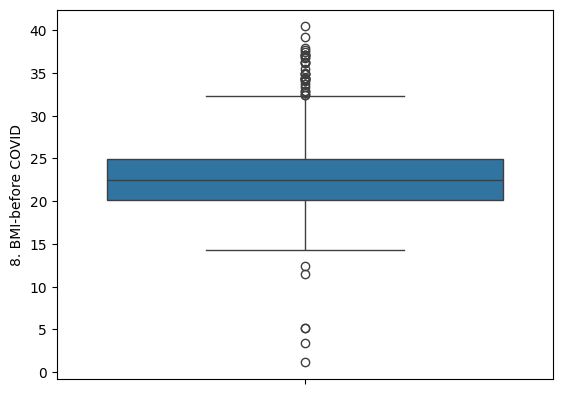

In [190]:
# checking for outliers
bmi_before = df.iloc[:, 8]
sns.boxplot(bmi_before)

<Axes: >

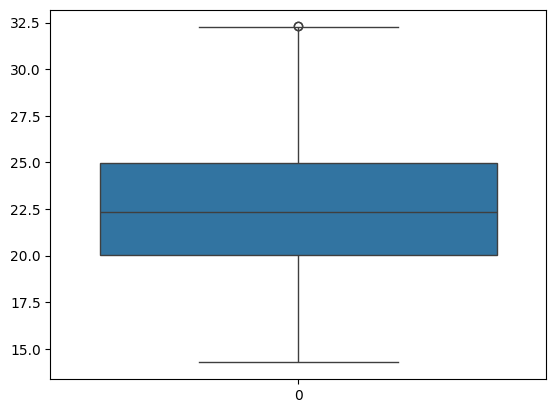

In [191]:
# removed outliers
q1 = bmi_before.quantile(0.25)
q3 = bmi_before.quantile(0.75)

IQR = q3 - q1

lf = float(q1 - 1.5 * IQR)
uf = float(q3 + 1.5 * IQR)

bmi_before = list(filter(lambda x: x <= uf and x >= lf, bmi_before.tolist()))
bmi_before = pd.DataFrame(bmi_before)

sns.boxplot(bmi_before)

<Axes: ylabel='9. BMI at present'>

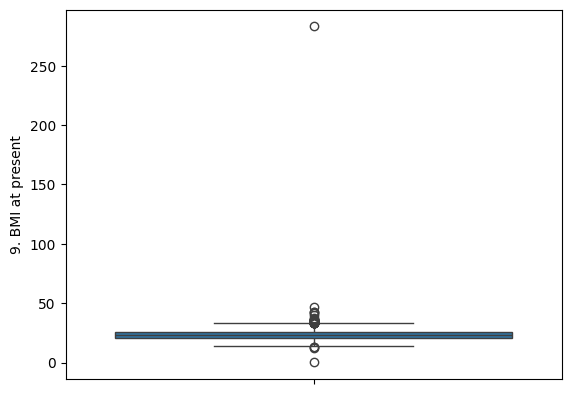

In [192]:
 # checking for outliers
 bmi_now = df.iloc[:, 9]
 sns.boxplot(bmi_now)

<Axes: >

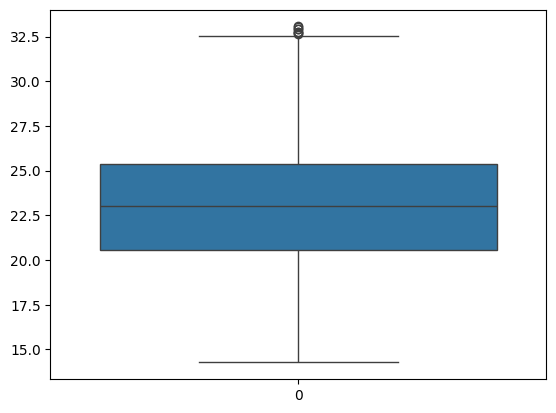

In [193]:
# removed outliers
q1 = bmi_now.quantile(0.25)
q3 = bmi_now.quantile(0.75)

IQR = q3 - q1

lf = float(q1 - 1.5 * IQR)
uf = float(q3 + 1.5 * IQR)

bmi_now = list(filter(lambda x: x <= uf and x >= lf, bmi_now.tolist()))
bmi_now = pd.DataFrame(bmi_now)

sns.boxplot(bmi_now)

**Null hypothesis: mean1 - mean2 == 0**<br>
**Alternative hypothesis: mean1 - mean2 != 0**

In [194]:
# calculating sample size, mean and variance
sample_mean1 = bmi_before.mean()
sample_mean2 = bmi_now.mean()
known_variance1 = bmi_before.var()
known_variance2 = bmi_now.var()
sample_size1 = bmi_before.count()
sample_size2 = bmi_now.count()

In [195]:
def z_test_two_pop(sample_mean1, sample_mean2, known_variance1, known_variance2, sample_size1, sample_size2):
    z_score = (sample_mean1 - sample_mean2) / np.sqrt(known_variance1/sample_size1 + known_variance2/sample_size2)
    p_value = 2 * (1 - norm.cdf(np.abs(z_score)))
    return z_score, p_value

In [196]:
# calculating z and p value of z test
z_score, p_value = z_test_two_pop(sample_mean1 = sample_mean1,
                                  sample_mean2 = sample_mean2,
                                  known_variance1 = known_variance1,
                                  known_variance2 = known_variance2,
                                  sample_size1 = sample_size1,
                                  sample_size2 = sample_size2)

In [197]:
alpha = 0.05
if p_value < alpha:
  print("reject")
else:
  print("not reject")

reject


From the hypothesis test we found that p_value < alpha<br>
that means we reject the null hypothesis<br>
It means that there are enough evidance to say that there is a significant difference between the mean bmi before covid and the mean bmi after covid

In [198]:
male_increased = len(df[(df['1. Gender=? ']=='Male') & (df['15. physical disturbance']=='Increased')])
male_decreased = len(df[(df['1. Gender=? ']=='Male') & (df['15. physical disturbance']=='Decreased')])
male_same = len(df[(df['1. Gender=? ']=='Male') & (df['15. physical disturbance']=='Same as before')])

female_increased = len(df[(df['1. Gender=? ']=='Female') & (df['15. physical disturbance']=='Increased')])
female_decreased = len(df[(df['1. Gender=? ']=='Female') & (df['15. physical disturbance']=='Decreased')])
female_same = len(df[(df['1. Gender=? ']=='Female') & (df['15. physical disturbance']=='Same as before')])

print('male_increased -> ', male_increased)
print('male_increased -> ', male_decreased)
print('male_increased -> ', male_same)

print('female_increased -> ', female_increased)
print('female_increased -> ', female_decreased)
print('female_increased -> ', female_same)

male_increased ->  295
male_increased ->  139
male_increased ->  446
female_increased ->  275
female_increased ->  91
female_increased ->  356


| gender      |increase| decreased | same  | Total |
|-------------|--------|-----------|-------|-------|
| Male        | 295    | 139       | 446   | 880   |
| Female      | 275    | 91        | 356   | 722   |
| Total       | 570    | 230       | 822   | 1602  |


**Null hypothesis: there is no sigificant relation between gender and physical disturbance during covid**<br>
**Alternative hypothesis: there is a sigificant relation between gender and physical disturbance during covid**

In [199]:
# Observed frequencies
observed = np.array([[male_increased, male_decreased, male_same], [female_increased, female_decreased, female_same]])

# Perform the Chi-Square Test
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

print("Chi-Square Statistic:", chi2)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

Chi-Square Statistic: 5.287305927035013
P-value: 0.0711010649903775
Degrees of Freedom: 2
Expected Frequencies:
 [[313.10861423 126.34207241 440.54931336]
 [256.89138577 103.65792759 361.45068664]]


In [200]:
critical_value = stats.chi2.ppf(q = 0.95, df = int(dof))
print(critical_value)
print(chi2)

if critical_value < chi2:
  print('reject')
else:
  print('accept')


5.991464547107979
5.287305927035013
accept


From the chi test we found critical_value > chi2<br>
It means that out null  hypothesis is true and we accept it<br>
therefore we can say that there is no relation between the gender and the increase in physical disturbance